# Machine learning 2 - Classification

# Import libraries

In [75]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### For classification visualization purpose ###
from sklearn.datasets import make_classification
from scipy.spatial.distance import cdist
from utils import visualize_svm_model, visualize_knn_model

### Import machine learning algorithms ###
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('ggplot') # change plot style

# New classification algorithms

## 1. K-Nearest Neighbors (KNN)
* KNN is a simple classification model that makes it prediction merely on the class of the majority of observations near it.

### 1.1. Create dataset

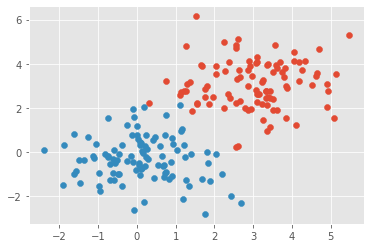

In [8]:
### Function to create sample fake dataset ###
def create_normal_samples(mean_1=0.0, mean_2=2.0, samples_per_classes=100):
    X = np.concatenate([
        np.random.normal(loc=mean_1, size=(samples_per_classes, 2)), 
        np.random.normal(loc=mean_2, size=(samples_per_classes, 2))
    ])
    Y = np.concatenate([np.ones(100,), np.zeros(100,)])

    return X, Y

X, Y = create_normal_samples(mean_2=3.0)

for class_ in np.unique(Y):
    cluster = X[Y == class_]
    plt.scatter(cluster[:,0], cluster[:, 1])
    
plt.show()

### 1.2. Create KNN model with k = 5

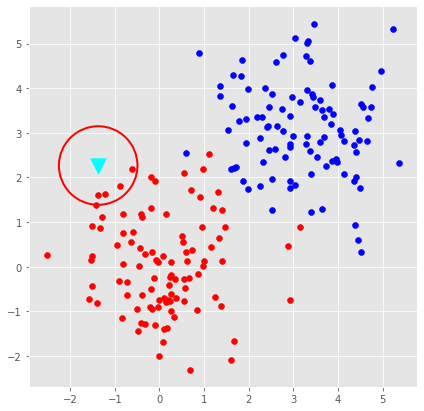

In [9]:
X, Y = create_normal_samples(mean_2=3.0)
visualize_knn_model(X, Y)

## 2. Support Vector Machine
* Support vector machine is another simple classifier but affective and widely used in many problems. The objective is find a decision boundary (A linear function, if not considering the kernel trick) that maximize the margin between the two classes.
* Last time we talked about gradient descent being an algorithm to minimize a judging criteria. So what is the judging criteria for SVM ?

#### Hinge loss 
![Hinge Loss formula](https://raw.githubusercontent.com/tejasmhos/Linear-SVM-Using-Squared-Hinge-Loss/master/equation.jpeg)

#### Implement gradient descent with hinge loss 

Iter# 1  Weights :  [0.87591506 0.20211567]  Bias :  [0.98992328]  Loss :  51.252603109347824
Iter# 2  Weights :  [0.80752269 0.15793867]  Bias :  [0.9806207]  Loss :  43.67310434806015
Iter# 3  Weights :  [0.74438452 0.11718347]  Bias :  [0.97203262]  Loss :  37.21602151462463
Iter# 4  Weights :  [0.68609594 0.07958654]  Bias :  [0.96410404]  Loss :  31.71513872980017
Iter# 5  Weights :  [0.63228351 0.04490465]  Bias :  [0.95678416]  Loss :  27.028854628801806
Iter# 6  Weights :  [0.58260253 0.0129133 ]  Bias :  [0.95002611]  Loss :  23.036537256356286
Iter# 7  Weights :  [ 0.53673486 -0.01659473]  Bias :  [0.94378662]  Loss :  19.635418756685524
Iter# 8  Weights :  [ 0.49438685 -0.0438107 ]  Bias :  [0.93802575]  Loss :  16.737949921470044
Iter# 9  Weights :  [ 0.45528747 -0.06891114]  Bias :  [0.93270666]  Loss :  14.269546496517124
Iter# 10  Weights :  [ 0.41918655 -0.09205897]  Bias :  [0.92779532]  Loss :  12.16666923251801
Iter# 11  Weights :  [ 0.38585321 -0.1134046 ]  Bias :  

Iter# 86  Weights :  [-0.07369906 -0.27264202]  Bias :  [0.8654996]  Loss :  0.38615538289578627
Iter# 87  Weights :  [-0.07276972 -0.27050457]  Bias :  [0.86632581]  Loss :  0.3811873975825949
Iter# 88  Weights :  [-0.07522455 -0.27273244]  Bias :  [0.8654977]  Loss :  0.3821139417837699
Iter# 89  Weights :  [-0.07429183 -0.27059087]  Bias :  [0.86632569]  Loss :  0.3828027129019803
Iter# 90  Weights :  [-0.07673016 -0.27280386]  Bias :  [0.86550249]  Loss :  0.3781982485757005
Iter# 91  Weights :  [-0.07579416 -0.27065835]  Bias :  [0.86633219]  Loss :  0.3843586103472841
Iter# 92  Weights :  [-0.07486598 -0.26852997]  Bias :  [0.86715525]  Loss :  0.3782156684389447
Iter# 93  Weights :  [-0.07731989 -0.27076099]  Bias :  [0.86632676]  Loss :  0.38205825925453196
Iter# 94  Weights :  [-0.0763883  -0.26862841]  Bias :  [0.86715164]  Loss :  0.3798575877982569
Iter# 95  Weights :  [-0.07882559 -0.27084441]  Bias :  [0.86632809]  Loss :  0.37811338777932785
Iter# 96  Weights :  [-0.0778

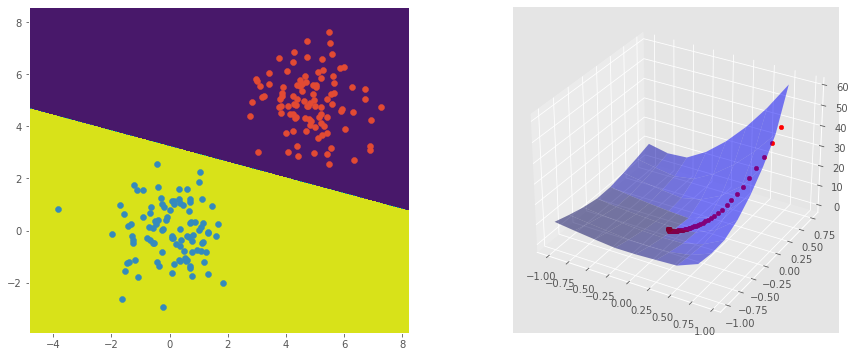

In [10]:
X, Y = create_normal_samples(mean_2=5.0)
visualize_svm_model(X, Y, lr=0.001, iterations=100)

<img src='./regression_viz.gif?9' width=1080, height=480>

## 3. Naive Bayes

![Naive Bayes formula](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)

In [26]:
# Example : Probability of diabetes given high blood pressure and no lactose intolerance
# Naive bayes example
data = pd.DataFrame(data = {
    'Diabetes' : [True, True, True, False],
    'High BP'  : [True, False, True, False],
    'Lactose Intolerance' : [True, True, False, False]
})

### Example : find P(Diabetes | High BP and Can eat cheese)
# P(High BP and Can eat cheese | Diabetes)
#   -- P(High BP | Diabetes) = 2/3
#   -- P(Can eat cheese | Diabetes) = 1/3
P_B_given_A =  2/3 * 1/3

# P(Diabetes)
P_A = 3/4

# P(High BP and Can eat cheese)
P_B = 2/4 * 2/4
posterior = P_B_given_A * P_A / P_B

print('Probability that someone have diabetes given he has high BP and no lactose intolerance : ', posterior)

data.head()

Probability that someone have diabetes given he has high BP and no lactose intolerance :  0.6666666666666666


,Diabetes,High BP,Lactose Intolerance
0,True,True,True
1,True,False,True
2,True,True,False
3,False,False,False


# Exploratory data analysis
## 1. Loading and preprocessing data

In [27]:
data = pd.read_csv('../datasets/wine.csv')
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Distribution of class and 

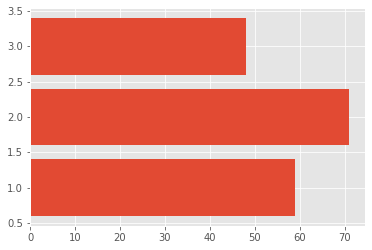

In [28]:
class_count = data.groupby('Class').size()
classes = list(data.groupby('Class').sum().index)

plt.barh(classes, class_count)
plt.show()

In [29]:
cols_isna = data.isna().any()
na_cols = data.columns[cols_isna].values

print('There are ', len(na_cols), ' columns with missing values ... ')

There are  0  columns with missing values ... 


## 3. Distribution of each attributes by classes

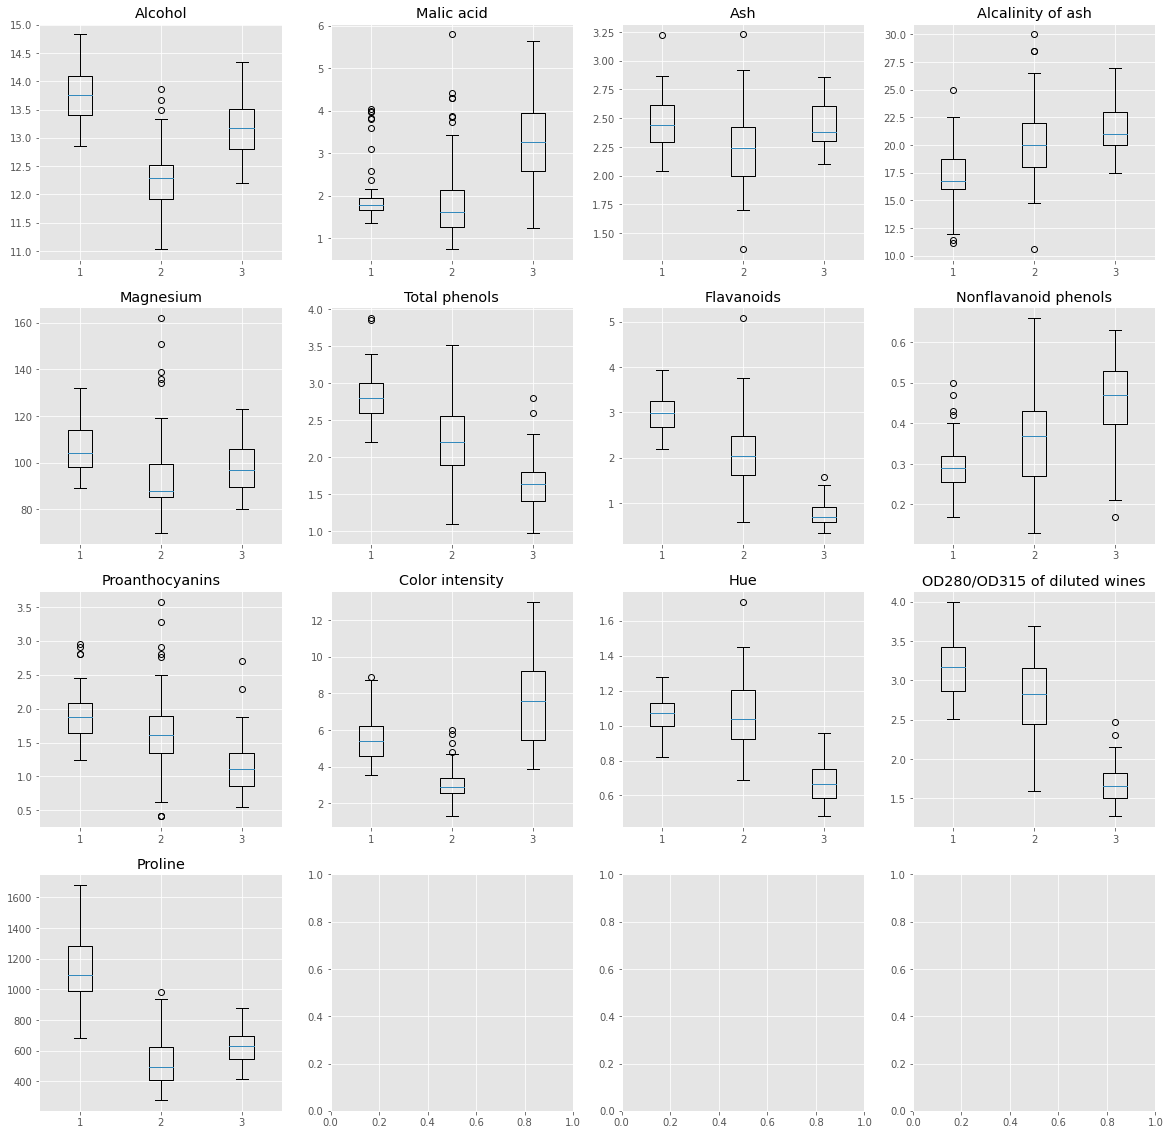

In [42]:
columns = list(data.columns)
columns.remove('Class')
classes = data['Class'].unique()

grid_size = int(np.sqrt(len(columns))) + 1
fig, ax = plt.subplots(grid_size, grid_size, figsize=(5*grid_size, 5 * grid_size))

for i, column in enumerate(columns):
    grid_row = i // grid_size
    grid_col = i % grid_size
    
    distributions = []
    for class_ in classes:
        dist = data[column][data['Class'] == class_]
        distributions.append(dist)
    
    ax[grid_row][grid_col].boxplot(distributions)
    ax[grid_row][grid_col].set_title(column)
        
plt.show()

## 4. What are the attributes most correlated to class, are they enough to classify wine into classes?

In [50]:
# Rename a long column name first
data = data.rename(columns={'OD280/OD315 of diluted wines' : 'protein concentration'})

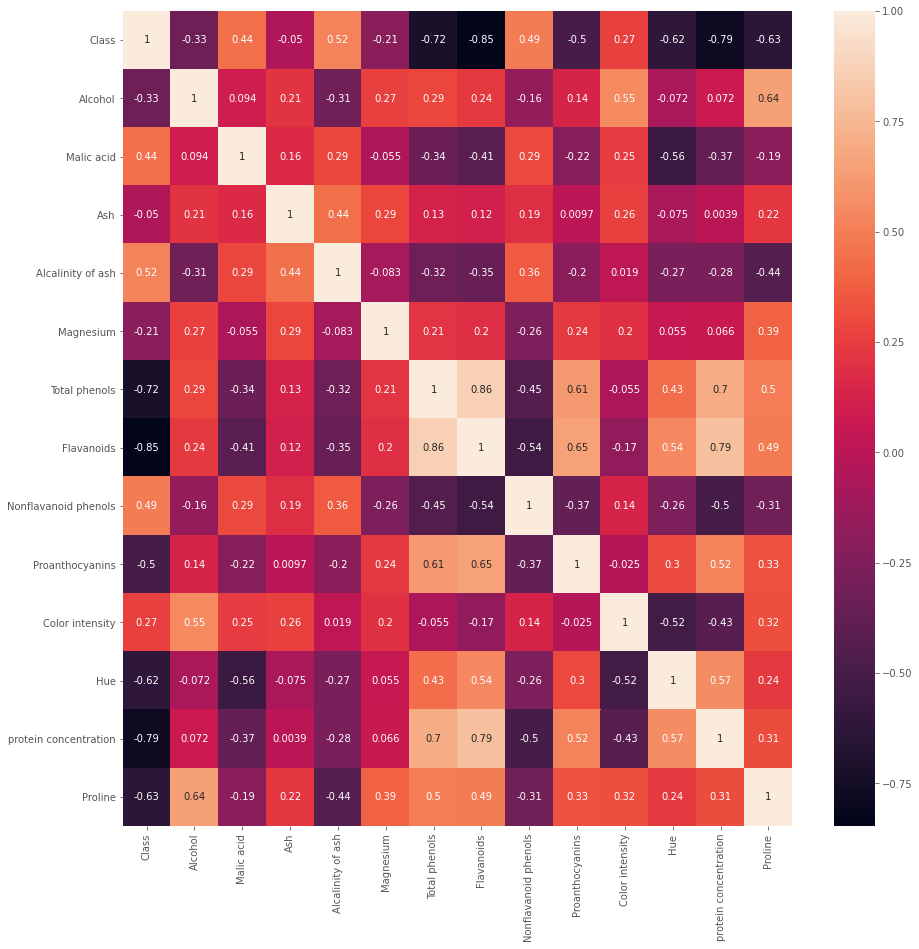

In [51]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Top columns with highest correlation is :  ['Total phenols' 'protein concentration' 'Flavanoids']


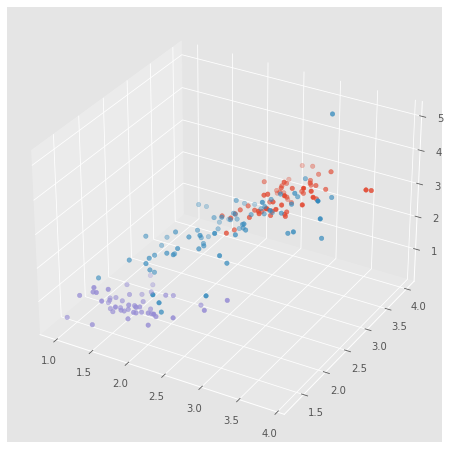

In [69]:
k = 3
sorted_corr_matrix = corr_matrix['Class'].apply(lambda x : abs(x)).sort_values()
columns = list(sorted_corr_matrix.index)

columns = np.array(columns)[np.argsort(sorted_corr_matrix)]
top_columns = columns[-1-k:-1]
print('Top columns with highest correlation is : ', top_columns)

if(k == 2):
    fig, ax = plt.subplots()

    for class_ in data['Class'].unique():
        cluster = data[data['Class'] == class_]
        ax.scatter(cluster[top_columns[0]], cluster[top_columns[1]])
    plt.show()
elif(k == 3):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for class_ in data['Class'].unique():
        cluster = data[data['Class'] == class_]
        ax.scatter3D(cluster[top_columns[0]], cluster[top_columns[1]], cluster[top_columns[2]])
    
    plt.show()
else:
    print('Not valid number of attributes selected ... ')

# Select the best model for this problem

## 1. Select features and preprocess them

In [76]:
models = {
    'Logistic Regression' : LogisticRegression,
    'Decision Tree' : DecisionTreeClassifier,
    'KNN' : KNeighborsClassifier,
    'Naive Bayes' : GaussianNB,
    'SVM' : SVC
}

# Select features using correlation
k = 6
sorted_corr_matrix = corr_matrix['Class'].apply(lambda x : abs(x)).sort_values()
columns = list(sorted_corr_matrix.index)

columns = np.array(columns)[np.argsort(sorted_corr_matrix)]
top_columns = columns[-1-k:-1]

features = data[top_columns]
targets = data['Class']

# Preprocess the features
pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

## 2. Cross validate the models

In [82]:
for name in models.keys():
    if(name != 'Naive Bayes' and name != 'Decision Tree'):
        prep_features = pipeline.fit_transform(features)
        scores = cross_val_score(models[name](), prep_features, targets, scoring='accuracy', cv=10)
    else:
        scores = cross_val_score(models[name](), features, targets, scoring='accuracy', cv=10)
        
    mean_score = np.array(scores).mean()
    print('Model ', name, ', Cross validation accuracy = ', mean_score)

Model  Logistic Regression , Cross validation accuracy =  0.9555555555555555
Model  Decision Tree , Cross validation accuracy =  0.8941176470588236
Model  KNN , Cross validation accuracy =  0.938562091503268
Model  Naive Bayes , Cross validation accuracy =  0.9388888888888889
Model  SVM , Cross validation accuracy =  0.961111111111111
